In [4]:
import gzip
import json
import pandas as pd

# Path to dataset
path = "/Users/animchnlap314/Documents/llm_recsys_dissertation/data/raw/Movies_and_TV_5.json.gz"

# Load JSON lines
data = []
with gzip.open(path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

df.head()


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   style           object 
 6   reviewerName    object 
 7   reviewText      object 
 8   summary         object 
 9   unixReviewTime  int64  
 10  vote            object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 289.4+ MB


In [6]:
df.shape


(3410019, 12)

In [7]:
df.columns


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [8]:
df["overall"].value_counts().sort_index()


overall
1.0     193169
2.0     172439
3.0     349700
4.0     665920
5.0    2028791
Name: count, dtype: int64

<Axes: title={'center': 'Rating Distribution (Movies & TV)'}, xlabel='overall'>

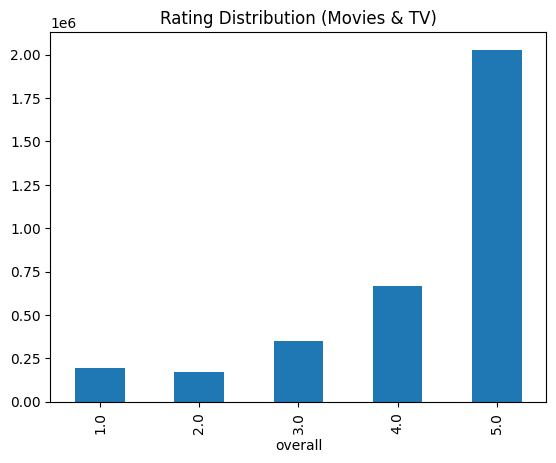

In [10]:
df["overall"].value_counts().sort_index().plot(
    kind="bar", title="Rating Distribution (Movies & TV)"
)


In [12]:
user_activity = df.groupby("reviewerID").size()
user_activity.describe()


count    297529.000000
mean         11.461132
std          24.909173
min           1.000000
25%           5.000000
50%           7.000000
75%          11.000000
max        3509.000000
dtype: float64

<Axes: title={'center': 'Reviews per User'}, ylabel='Frequency'>

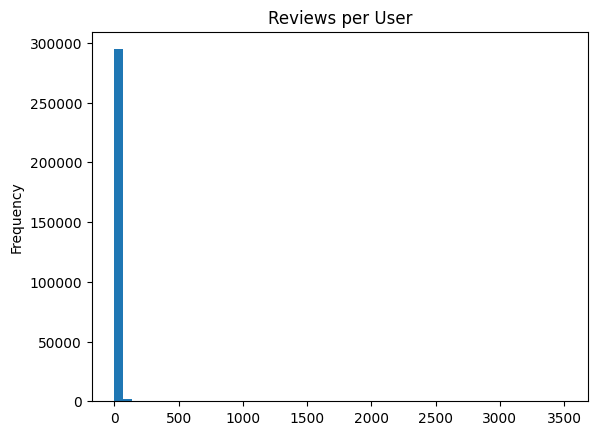

In [13]:
user_activity.plot(
    kind="hist", bins=50, title="Reviews per User"
)


In [14]:
item_popularity = df.groupby("asin").size()
item_popularity.describe()


count    60175.000000
mean        56.668367
std        179.928211
min          1.000000
25%          8.000000
50%         16.000000
75%         40.000000
max       7195.000000
dtype: float64

In [15]:
df["review_length"] = df["reviewText"].fillna("").apply(len)
df["review_length"].describe()


count    3.410019e+06
mean     4.588922e+02
std      9.366686e+02
min      0.000000e+00
25%      4.000000e+01
50%      1.350000e+02
75%      4.290000e+02
max      3.375900e+04
Name: review_length, dtype: float64

In [21]:
df_clean = df[
    ["reviewerID", "asin", "overall", "reviewText", "summary", "unixReviewTime"]
].dropna(subset=["reviewText"])

# Sample for feasibility
df_clean = df_clean.sample(200_000, random_state=42)
df_clean.to_csv("/Users/animchnlap314/Documents/llm_recsys_dissertation/data/processed/movies_tv_clean.csv", index=False)
